# International football resluts from 1872-2017

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
results = pd.read_csv("/content/drive/MyDrive/results.csv", engine="python")
print(results.dtypes)
display(results)

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41871,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False
41872,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False
41873,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False
41874,2020-12-04,Qatar,Bangladesh,5,0,FIFA World Cup qualification,Doha,Qatar,False


In [9]:
conditions=[ results['home_score']>results['away_score'],results['home_score']==results['away_score'],results['home_score']<results['away_score']]
match_result=[ "home_win", 'draw', 'away_win']

results["result"] = np.select(conditions, match_result)
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,home_win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,home_win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,home_win
...,...,...,...,...,...,...,...,...,...,...
41871,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False,draw
41872,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False,home_win
41873,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False,away_win
41874,2020-12-04,Qatar,Bangladesh,5,0,FIFA World Cup qualification,Doha,Qatar,False,home_win


In [10]:
def home_away_draws(df): #returns number of home wins, away wins, draws and total games played 
    home_wins=len(df[df.away_score<df.home_score])
    away_wins=len(df[df.away_score>df.home_score])
    draws=len(df[df.away_score==df.home_score])
    total_games_played=home_wins+away_wins+draws
    avg_home=df['home_score'].mean()
    avg_away=df['away_score'].mean()
    return home_wins,away_wins,draws,total_games_played,avg_home,avg_away

In [11]:
def draw_pie(title, pie):
    labels = ['Home wins', 'Away wins', 'Draws']
    sizes = pie
    colors = ['#39375b','#745c97','#d597ce']
    plt.figure(figsize=(15,10))
    fig1, ax1 = plt.subplots()
    plt.title(title)
    patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('white')
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

##### I checked the same stats for Non-friendly matches and it confirms the same relations above

### Major Tournaments
FIFA (Intercontinental competitions) Confederations Cup & FIFA World Cup  
AFC (Asian competitions) AFC Asian Cup  
CAF (African competitions) African Cup of Nations  
CONCACAF (North American, Central American, and Caribbean competitions) NAFU,CCCF Championship & Gold Cup  
CONMEBOL (South American competitions) Copa América  
OFC (Oceanian competitions) Oceania Nations Cup  
UEFA (European competitions)  UEFA Euro

I have just picked out 'Major' tournaments. The critera for major is debatable and I would love to see a discussion about it

https://en.wikipedia.org/wiki/List_of_association_football_competitions

In [12]:
major_tournaments = ['FIFA World Cup','Confederations Cup','Oceania Nations Cup','CCCF Championship','AFC Asian Cup','Copa América','Gold Cup','UEFA Euro','NAFU Championship','African Cup of Nations']

major=results.loc[results['tournament'].isin(major_tournaments) , :]

In [ ]:
major_tournaments = ['Friendly']

major=results.loc[results['tournament'].isin(major_tournaments) , :]

*italicized text*## Home or Away?

Away wins: 1117
Home wins: 1798
Draws: 842
Home side goal per game: 1.6766036731434655
Away side goal per game: 1.2086771360127762
0.4785733297844024
0.2973116848549375
0.2241149853606601


<Figure size 1080x720 with 0 Axes>

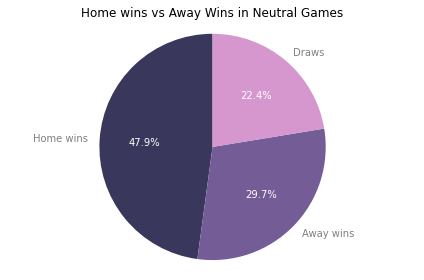

In [13]:
#All games including matches that were played in nuetral grounds
m_home_wins, m_away_wins, m_draws, m_total_games_played, m_home_score_avg, m_away_score_avg = home_away_draws(major)
print(f'Away wins: {m_away_wins}')
print(f'Home wins: {m_home_wins}')
print(f'Draws: {m_draws}')
print(f'Home side goal per game: {m_home_score_avg}')
print(f'Away side goal per game: {m_away_score_avg}')

m_home_win_percent=m_home_wins/m_total_games_played
m_away_win_percent=m_away_wins/m_total_games_played
m_draw_percent=m_draws/m_total_games_played

print(m_home_win_percent)
print(m_away_win_percent)
print(m_draw_percent)

draw_pie("Home wins vs Away Wins in Neutral Games", [m_home_win_percent,m_away_win_percent,m_draw_percent])

Away wins: 174
Home wins: 548
Draws: 190
Home side goal per game: 1.9989035087719298
Away side goal per game: 0.9528508771929824
0.6008771929824561
0.19078947368421054
0.20833333333333334


<Figure size 1080x720 with 0 Axes>

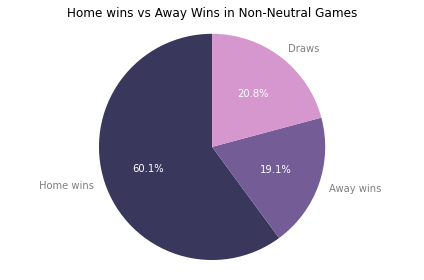

In [14]:
#Matches that were played in either home or away grounds (non-neutral games)
major_nn = major[major['neutral']==False]
nn_m_home_wins, nn_m_away_wins, nn_m_draws, nn_m_total_games_played, nn_m_home_score_avg, nn_m_away_score_avg = home_away_draws(major_nn)

print(f'Away wins: {nn_m_away_wins}')
print(f'Home wins: {nn_m_home_wins}')
print(f'Draws: {nn_m_draws}')
print(f'Home side goal per game: {nn_m_home_score_avg}')
print(f'Away side goal per game: {nn_m_away_score_avg}')

nn_m_home_win_percent=nn_m_home_wins/nn_m_total_games_played
nn_m_away_win_percent=nn_m_away_wins/nn_m_total_games_played
nn_m_draw_percent=nn_m_draws/nn_m_total_games_played

print(nn_m_home_win_percent)
print(nn_m_away_win_percent)
print(nn_m_draw_percent)

draw_pie("Home wins vs Away Wins in Non-Neutral Games",[nn_m_home_win_percent,nn_m_away_win_percent,nn_m_draw_percent])

## Average goal per game 

In [15]:
#Goals by tournaments 
avg_goal=major.pivot_table(['home_score','away_score'],columns='tournament',aggfunc=np.sum)
avg_goal.loc['total']=avg_goal.sum(axis=0)
avg_goal=avg_goal.T
avg_goal

,away_score,home_score,total
tournament,,,
AFC Asian Cup,429,558,987
African Cup of Nations,723,948,1671
CCCF Championship,193,356,549
Confederations Cup,193,230,423
Copa América,1052,1554,2606
FIFA World Cup,1136,1412,2548
Gold Cup,336,567,903
NAFU Championship,11,17,28
Oceania Nations Cup,156,282,438


In [16]:
#Average Goals per Tournament 
count=major['tournament'].value_counts()
count=count.sort_index()
avg_goal['count']=count
avg_goal['avg']=avg_goal['total']/avg_goal['count']
avg_goal

,away_score,home_score,total,count,avg
tournament,,,,,
AFC Asian Cup,429,558,987,370,2.667568
African Cup of Nations,723,948,1671,690,2.421739
CCCF Championship,193,356,549,123,4.463415
Confederations Cup,193,230,423,140,3.021429
Copa América,1052,1554,2606,813,3.205412
FIFA World Cup,1136,1412,2548,900,2.831111
Gold Cup,336,567,903,327,2.761468
NAFU Championship,11,17,28,7,4.000000
Oceania Nations Cup,156,282,438,101,4.336634


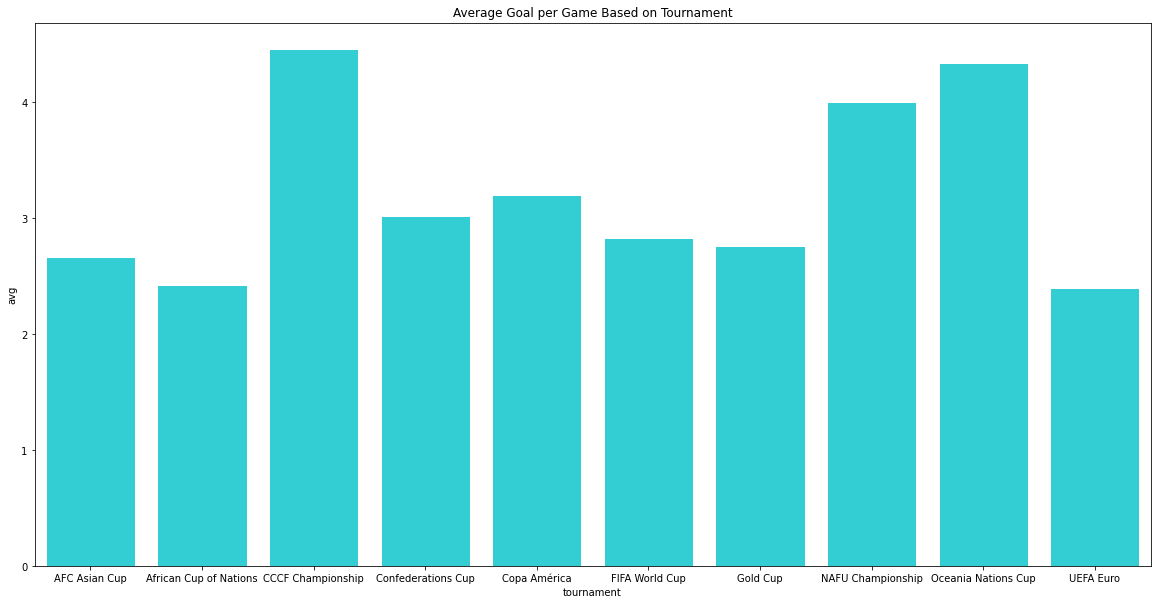

In [17]:
#Above table visualized
plt.figure(figsize=(20,10))
plt.title("Average Goal per Game Based on Tournament")
sns.set_style("darkgrid")
sns.barplot(x=avg_goal.index,y=avg_goal['avg'],color='#18E6EF');

## Countries that have hosted the most games

In [18]:
#Host country 
matches_hosted=pd.DataFrame()
matches_hosted['counts']=major['country'].value_counts()
matches_hosted['country']=major['country'].value_counts().index
matches_hosted=matches_hosted.reset_index()
matches_hosted.drop(columns=['index'],inplace=True)
matches_hosted.head(10)

,counts,country
0,393,United States
1,211,Brazil
2,168,France
3,160,Argentina
4,155,Chile
5,141,South Africa
6,133,Germany
7,120,Uruguay
8,117,Egypt
9,115,Mexico


In [21]:
#Conversion of counrtry names to ISO-3661-alpha-3 format for plotly
import pycountry

input_countries = matches_hosted['country']
change={"Netherlands Antilles":"Aruba","United Arab Republic":"Egypt","South Korea":"Korea, Republic of","Bolivia":"Bolivia, Plurinational State of","England":"United Kingdom","Iran":"Iran, Islamic Republic of","Venezuela":"Venezuela, Bolivarian Republic of","Yugoslavia":"Serbia","Ivory Coast":"Côte d'Ivoire","China PR":"Taiwan, Province of China","Vietnam":"Viet Nam","Russia":"Russian Federation"}

for i,country in enumerate(input_countries):
    if country in change:
        input_countries[i]=change[country]

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
matches_hosted['codes']=codes
matches_hosted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,counts,country,codes
0,393,United States,USA
1,211,Brazil,BRA
2,168,France,FRA
3,160,Argentina,ARG
4,155,Chile,CHL
...,...,...,...
72,6,Panama,PAN
73,4,Serbia,SRB
74,4,Jamaica,JAM
75,3,Egypt,EGY


In [20]:
! pip install pycountry

     |████████████████████████████████| 10.1MB 4.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=6036c594b55221e49d522aadf0eab1e9f49c60df3f4c256625105ef455a21589
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [22]:
#Cholorpleth of countries based on number of matches hosted
import plotly.graph_objects as go

plt.figure(figsize=(20,20))
fig = go.Figure(data=go.Choropleth(
    locations = matches_hosted['codes'],
    z = matches_hosted['counts'],
    text = "blue",
    colorscale = 'blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Games hosted',
))

fig.update_layout(
    title_text='Games hosted by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

<Figure size 1440x1440 with 0 Axes>

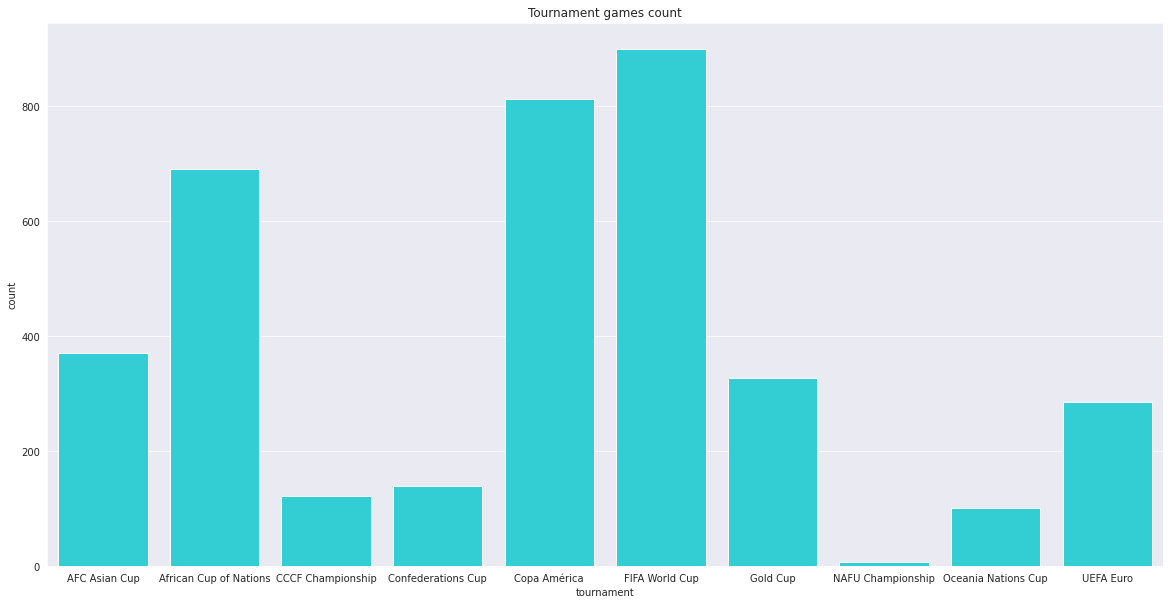

In [23]:
#Tournament that has had the most games
plt.figure(figsize=(20,10))
plt.title("Tournament games count")
sns.set_style("darkgrid")
sns.barplot(x=avg_goal.index,y=avg_goal['count'],color='#18E6EF');


## Country Wise data

In [24]:
#Goals scored by each team
home_scored=major.pivot_table(['home_score'],columns=["home_team"],aggfunc=np.sum)
home_scored=home_scored.T
away_scored=major.pivot_table(['away_score'],columns=["away_team"],aggfunc=np.sum)
away_scored=away_scored.T
home_scored=home_scored.rename(columns={"home_score":"scored"})
away_scored=away_scored.rename(columns={"away_score":"scored"})
scored_df=home_scored.append(away_scored)
scored_df=scored_df.groupby(level=0).sum()
scored_df

,scored
Albania,1
Algeria,106
Angola,31
Argentina,621
Aruba,8
...,...
Yemen,0
Yemen DPR,0
Yugoslavia,69
Zambia,81


In [25]:
#Goals conceded by each team
home_conceded=major.pivot_table(['away_score'],columns=["home_team"],aggfunc=np.sum)
home_conceded=home_conceded.T
away_conceded=major.pivot_table(['home_score'],columns=["away_team"],aggfunc=np.sum)
away_conceded=away_conceded.T
home_conceded=home_conceded.rename(columns={"away_score":"conceded"})
away_conceded=away_conceded.rename(columns={"home_score":"conceded"})
conceded_df=home_conceded.append(away_conceded)
conceded_df=conceded_df.groupby(level=0).sum()
conceded_df

,conceded
Albania,3
Algeria,104
Angola,41
Argentina,286
Aruba,9
...,...
Yemen,10
Yemen DPR,9
Yugoslavia,68
Zambia,69


In [26]:
# Number of games each team has played
home_games=major['home_team'].value_counts()
away_games=major['away_team'].value_counts()
games_count=home_games.append(away_games)
games_count=games_count.groupby(level=0).sum()

In [27]:
#Making a new table out of the data
countries_goals=pd.DataFrame(index=scored_df.index)
countries_goals['scored']=scored_df['scored']
countries_goals['conceded']=conceded_df['conceded']
countries_goals['games_played']=games_count
countries_goals['scored_avg']=countries_goals['scored']/countries_goals['games_played']
countries_goals['conceded_avg']=countries_goals['conceded']/countries_goals['games_played']
countries_goals

,scored,conceded,games_played,scored_avg,conceded_avg
Albania,1,3,3,0.333333,1.000000
Algeria,106,104,87,1.218391,1.195402
Angola,31,41,29,1.068966,1.413793
Argentina,621,286,286,2.171329,1.000000
Aruba,8,9,5,1.600000,1.800000
...,...,...,...,...,...
Yemen,0,10,3,0.000000,3.333333
Yemen DPR,0,9,2,0.000000,4.500000
Yugoslavia,69,68,43,1.604651,1.581395
Zambia,81,69,67,1.208955,1.029851


In [28]:
#Finding who won,drew or lost from every match 
home_wins_draws_loses=major[['home_team','result']]
home_wins_draws_loses.rename(columns={'home_team':'team'},inplace=True)
home_wins_draws_loses['result']=["win" if x=="home_win" else "draw" if x=="draw" else "lose" for x in home_wins_draws_loses['result']]
away_wins_draws_loses=major[['away_team','result']]
away_wins_draws_loses.rename(columns={'away_team':'team'},inplace=True)
away_wins_draws_loses['result']=["win" if x=="away_win" else "draw" if x=="draw" else "lose" for x in away_wins_draws_loses['result']]
wins_draws_loses_df=home_wins_draws_loses[['team','result']]
wins_draws_loses_df=wins_draws_loses_df.append(away_wins_draws_loses)
wins_draws_loses_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,team,result
439,Chile,lose
441,Argentina,win
442,Brazil,draw
443,Argentina,draw
445,Brazil,lose
...,...,...
40942,Tunisia,win
40948,Nigeria,lose
40949,Tunisia,lose
40956,Nigeria,win


In [29]:
#Aggregating the counts from the above table 
wins=wins_draws_loses_df.loc[(wins_draws_loses_df['result']=='win')]
wins=wins.groupby('team').count()
draws=wins_draws_loses_df.loc[(wins_draws_loses_df['result']=='draw')]
draws=draws.groupby('team').count()
loses=wins_draws_loses_df.loc[(wins_draws_loses_df['result']=='lose')]
loses=loses.groupby('team').count()

#Another option /major.pivot_table(index=['team','result'],aggfunc='count')['away_score']
#draws
wins
#loses

,result
team,
Albania,1
Algeria,31
Angola,4
Argentina,170
Aruba,1
...,...
Vietnam,2
Wales,5
Yugoslavia,16


In [30]:
countries=pd.DataFrame(index=countries_goals.index)
countries['wins']=[wins.loc[x]['result'] if x in wins.index else 0 for x in countries.index]
countries['draws']=[draws.loc[x]['result'] if x in draws.index else 0 for x in countries.index]
countries['loses']=[loses.loc[x]['result'] if x in loses.index else 0 for x in countries.index]
countries['games_played']=countries_goals['games_played']
countries['win_percentage']=((countries['wins']/countries['games_played'])*100).round(2)
countries

,wins,draws,loses,games_played,win_percentage
Albania,1,0,2,3,33.33
Algeria,31,24,32,87,35.63
Angola,4,14,11,29,13.79
Argentina,170,58,58,286,59.44
Aruba,1,1,3,5,20.00
...,...,...,...,...,...
Yemen,0,0,3,3,0.00
Yemen DPR,0,0,2,2,0.00
Yugoslavia,16,8,19,43,37.21
Zambia,26,20,21,67,38.81


In [31]:
#Somewhat of a metric for finding best teams
countries['weight']=countries['games_played']/100
countries['best']=(2*countries['win_percentage'])*countries['weight']

In [32]:
countries.loc[:,['wins','games_played','win_percentage','weight','best']].sort_values('best',ascending=False).head(10)

,wins,games_played,win_percentage,weight,best
Brazil,207,340,60.88,3.40,413.9840
Argentina,170,286,59.44,2.86,339.9968
Uruguay,139,267,52.06,2.67,278.0004
Mexico,102,210,48.57,2.10,203.9940
Germany,101,171,59.06,1.71,201.9852
United States,81,149,54.36,1.49,161.9928
Chile,78,223,34.98,2.23,156.0108
Paraguay,70,201,34.83,2.01,140.0166
Italy,64,129,49.61,1.29,127.9938
France,63,115,54.78,1.15,125.9940


In [ ]:
#Just checking the tail end of the data 
countries.loc[:,['wins','games_played','win_percentage','weight','best']].sort_values('best',ascending=False).tail(60)

,wins,games_played,win_percentage,weight,best
Gibraltar,4,18,22.22,0.18,7.9992
Galicia,4,9,44.44,0.09,7.9992
Laos,4,27,14.81,0.27,7.9974
Andorra,3,45,6.67,0.45,6.0030
Macau,3,31,9.68,0.31,6.0016
Silesia,3,8,37.50,0.08,6.0000
Canary Islands,3,4,75.00,0.04,6.0000
Comoros,2,10,20.00,0.10,4.0000
Cayman Islands,2,18,11.11,0.18,3.9996
Tuvalu,2,6,33.33,0.06,3.9996


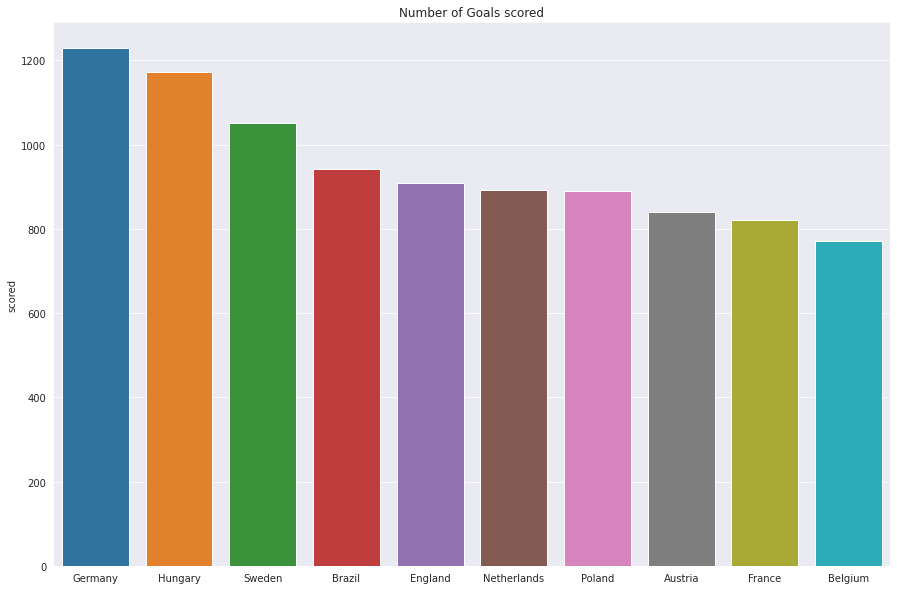

In [ ]:
#Goals scored
plot_data=countries_goals.sort_values("scored",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.title("Number of Goals scored")
sns.set_style('darkgrid')
sns.barplot(x=plot_data.index,y=plot_data['scored'])

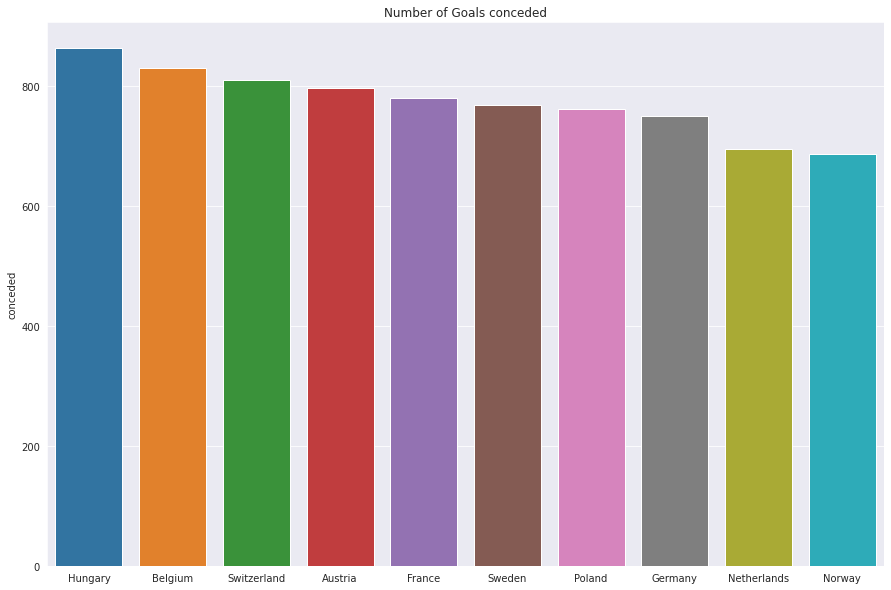

In [ ]:
#Number of goals conceded 
plot_data=countries_goals.sort_values("conceded",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.title("Number of Goals conceded")
sns.set_style('darkgrid')
sns.barplot(x=plot_data.index,y=plot_data['conceded'])

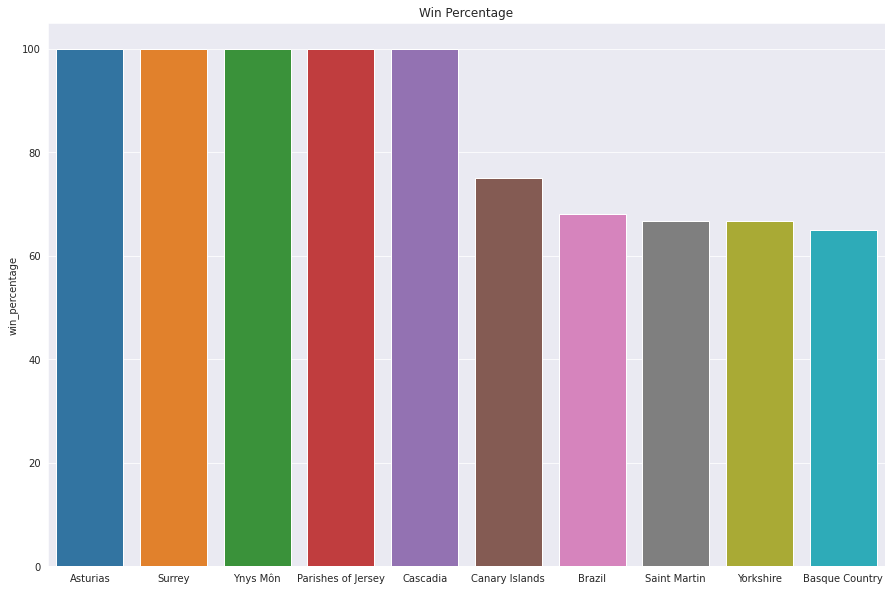

In [ ]:
plot_data=countries.sort_values("win_percentage",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.title("Win Percentage")
sns.set_style('darkgrid')
sns.barplot(x=plot_data.index,y=plot_data['win_percentage'])

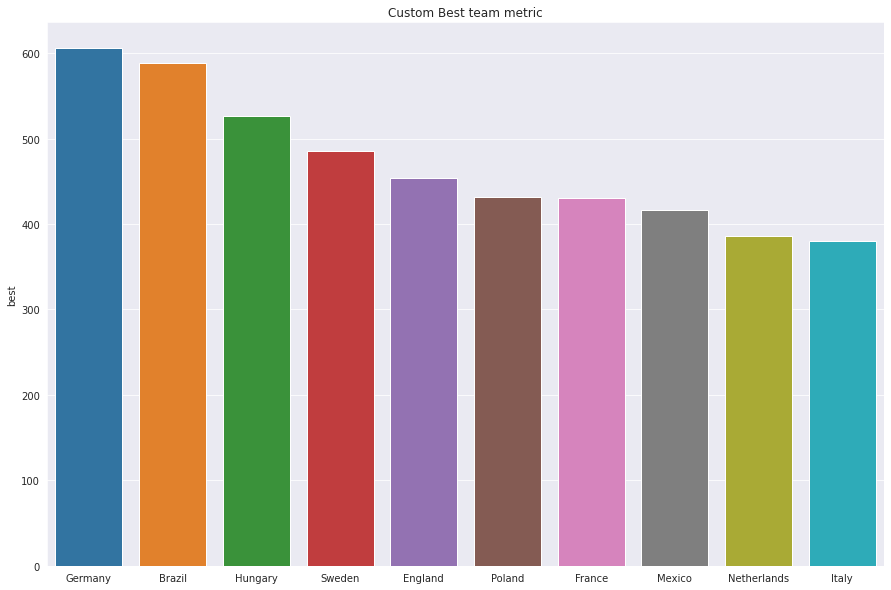

In [ ]:
plot_data=countries.sort_values("best",ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.title("Custom Best team metric")
sns.set_style('darkgrid')
sns.barplot(x=plot_data.index,y=plot_data['best'])